### Step - 1: Bussiness Problem Understanding

- **Indentify relationship b/w total advertising spend and sales.**
- **Our next ad camapaign will have a total spend of 200,000(dollars), how many units do we expect to sell as a result of this?**

### Step - 2: Data Understanding

**Data**

This sample data dispalys sales for a particular product as a function of adverstising budgets (in dollars) for TV, radio and newspaper media.

**Independent Variables**
- TV: Adverstising dollars spent on TV for a single product in a given, market(in dollars)
- Radio: Adverstsing dollars spent on Radio
- Newspaper: Adverstising dollars spend on newspaper

**Target Varaible**
- Sales: Sales of a single product in a given market
- Collect & load data
- Dataset Understanding

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230100,37800,69200,22100
1,44500,39300,45100,10400
2,17200,45900,69300,9300
3,151500,41300,58500,18500
4,180800,10800,58400,12900


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   TV         200 non-null    int64
 1   radio      200 non-null    int64
 2   newspaper  200 non-null    int64
 3   sales      200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


### Step - 3: Data Processing

- By combining all the features, we get the 'total spend'

In [4]:
df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']
df.head()

,TV,radio,newspaper,sales,total_spend
0,230100,37800,69200,22100,337100
1,44500,39300,45100,10400,128900
2,17200,45900,69300,9300,132400
3,151500,41300,58500,18500,251300
4,180800,10800,58400,12900,250000


In [5]:
df.drop(columns=['TV','radio','newspaper'],inplace=True)
df.head()

,sales,total_spend
0,22100,337100
1,10400,128900
2,9300,132400
3,18500,251300
4,12900,250000


**Exploratory Data Analysis(EDA)**

In [6]:
df.describe()

,sales,total_spend
count,200.000000,200.000000
mean,14022.500000,200860.500000
std,5217.456566,92985.180587
min,1600.000000,11700.000000
25%,10375.000000,123550.000000
50%,12900.000000,207350.000000
75%,17400.000000,281125.000000
max,27000.000000,433600.000000


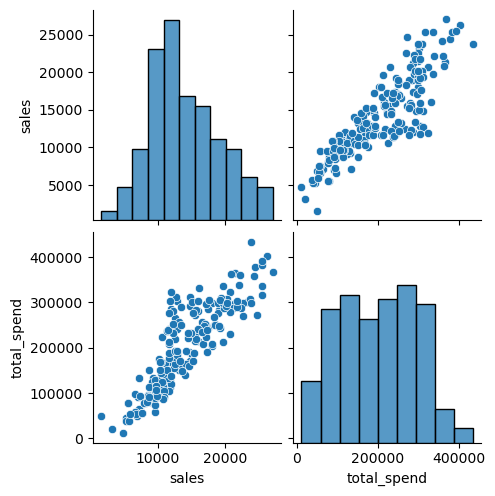

In [7]:
sns.pairplot(df)
plt.show()

In [8]:
df.corr()

,sales,total_spend
sales,1.000000,0.867712
total_spend,0.867712,1.000000


In [9]:
df.isnull().sum()

sales          0
total_spend    0
dtype: int64

**Data Wrangling**

No encoding is required (no categorical data)

**Create x and y**

In [10]:
x = df[['total_spend']]
y = df['sales']

**Train Test Split**

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=77)

In [12]:
x_train

,total_spend
50,237500
115,162800
5,132600
6,113800
114,159500
...,...
159,184700
152,235100
37,169800
84,290300


### Step - 4: Modelling

                    y^ = β0 + β1x

In [13]:
# Import
from sklearn.linear_model import LinearRegression

# Save the model
model = LinearRegression()

# Fit
model.fit(x_train,y_train)

print('Coefficient:',model.coef_)
print('Intercept:',model.intercept_)

Coefficient: [0.04784052]
Intercept: 4389.814518436082


### Step -5: Evaluation

**Predictions**

In [14]:
ypred_test = model.predict(x_test)

**Mean Absolute Error (MAE)** is the mean absloute values of the errors.

              MAE = (1/n) Σ|y-y^|

In [15]:
from sklearn.metrics import mean_absolute_error
print("Test MAE:", mean_absolute_error(y_test,ypred_test))

Test MAE: 1915.90776501548


**Mean Squared Error(MSE)** is the mean of squared errors.
                     
                   MSE = ((1/n) Σ|y-y^|)**2

In [16]:
from sklearn.metrics import mean_squared_error
print('Test MSE:',mean_squared_error(y_test,ypred_test))

Test MSE: 5868943.149727303


**Root mean squared error(RMSE)** is the square root if the mean of the squared error
    
                   RMSE = √((1/n) Σ|y-y^|)**2

In [17]:
print('Test RMSE:',np.sqrt(mean_squared_error(y_test,ypred_test)))

Test RMSE: 2422.590173704026


In [18]:
# Test R2
print("Test R2:",model.score(x_test,y_test))

Test R2: 0.7868779454628924


### Model Selection 

**Checklist 1: Check whether model is good or either having overfitting/underfitting problem**

**Test accuracy = Train accuracy**

In [19]:
# Prediction on the train data
ypred_train = model.predict(x_train)

# Train R2
print('Train R2:',model.score(x_train,y_train))

Train R2: 0.7426281082244577


**Checklist 2: Whether the test accuracy = cross validation score**

- train=75%, test=25% --> k = cv = 4
- train=80%, test=20% --> k = cv = 5

In [20]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model,x,y,cv=5)
print(scores)

print('Cross Validation Score:',scores.mean())

[0.74964192 0.79455226 0.76417134 0.74872042 0.65980565]
Cross Validation Score: 0.7433783178555419


**Checklist 3: Check whether, it satisfies the Bussiness Problem Requirements**

**Checklist 4(only for Linear Regression): Check for assumptions**

**1.Linearity of Errors**

In [21]:
error = y_test - ypred_test

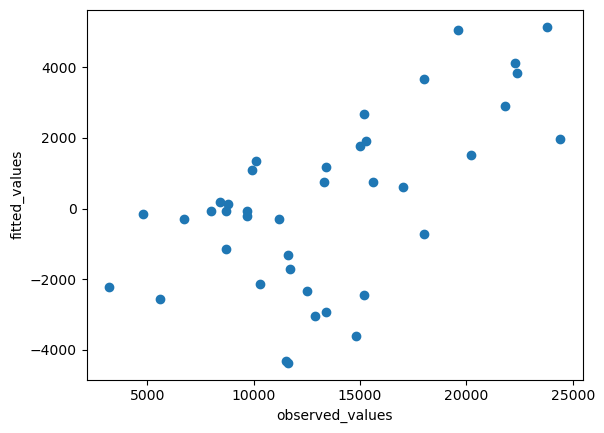

In [22]:
plt.scatter(y_test,error)
plt.xlabel('observed_values')
plt.ylabel('fitted_values')
plt.show()

**2.Normality of Errors**

In [23]:
error.skew()

0.17729242735315792

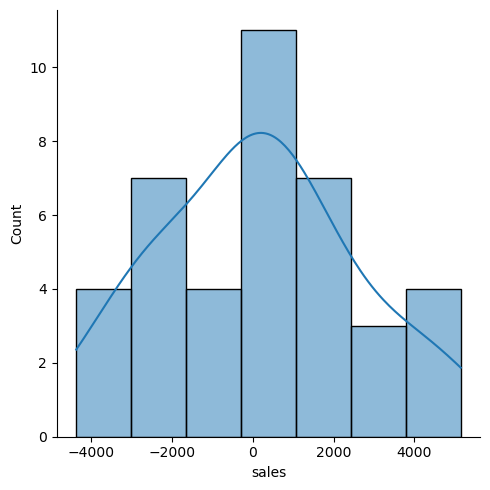

In [24]:
sns.displot(error,kde=True)
plt.show()

**3.Equal Variance of Errors(Homoscadesicity)**

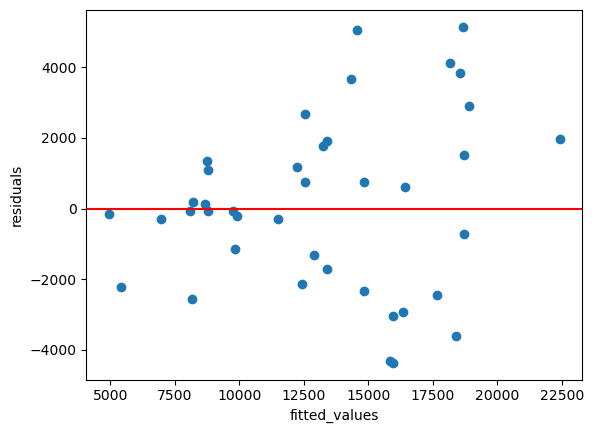

In [25]:
plt.scatter(ypred_test,error)
plt.axhline(y=0,color='red')
plt.xlabel('fitted_values')
plt.ylabel('residuals')
plt.show()

**4.Variables Significance**

In [26]:
import statsmodels.formula.api as smf  # Check for R2 value, it should be is +ve 
model2=smf.ols('y~x',data=df).fit()    # Check for P value [x] , it should be <0.05
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     603.4
Date:                Thu, 27 Jul 2023   Prob (F-statistic):           5.06e-62
Time:                        20:49:31   Log-Likelihood:                -1855.4
No. Observations:                 200   AIC:                             3715.
Df Residuals:                     198   BIC:                             3721.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4243.0282    438.525      9.676      0.000    3378.249    5107.807
x              0.0487      0.002     24.564      0.000       0.045       0.053
==============================================================================
Omnibus:                        6.851   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                6.692
Skew:                          -0.373   Prob(JB):                       0.0352
Kurtosis:                       3.495   Cond. No.                     5.28e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.28e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Final Model

In [28]:
#Modeling
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
print('Intercept:',model.intercept_)
print('Coefficent:',model.coef_)

#Prediction
ypred_train = model.predict(x_train)
ypred_test = model.predict(x_test)

#Evaluation
print("Train R2:",model.score(x_train,y_train))
print('Test R2:',model.score(x_test,y_test))
print('Cross Validation Score:',cross_val_score(model,x,y,cv=5).mean())

Intercept: 4389.814518436082
Coefficent: [0.04784052]
Train R2: 0.7426281082244577
Test R2: 0.7868779454628924
Cross Validation Score: 0.7433783178555419


                    y^ = β0 + β1x
                    
     Sales = 0.04784052(total_spend) + 4389.814518436082

**Interpreting the coefficients**

- A **1 unit increase in total spend** is associated with an **increase of 0.0478 units in sale**. 
- This basically means that for every 10000 dollars spend on ads, we could expect 478 more units to sold.

**Use the model to make predictions on a new value. For a total spend of 200k on ads, how many units colud we expect to be sold?**

In [31]:
new_data = pd.DataFrame({'total_spend':[200000]})
new_data

,total_spend
0,200000


In [32]:
model.predict(new_data)

array([13957.91946809])

In [33]:
# Save the model
from joblib import dump

dump(model, 'sales_model.joblib')

['sales_model.joblib']

In [34]:
# Load a Model & Predict
from joblib import load

loaded_model = load('sales_model.joblib')

loaded_model.predict(new_data)

array([13957.91946809])